<font size=5>第 1 章 解析方法与几何模型 </font>

<font size=4>1.3 - 1.4 节的示例：2023 年高教社杯全国大学生数学建模竞赛 B 题</font>

>整理自
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

> 题目相关资料：
>
> 1、[题目：2023 年高教社杯全国大学生数学建模竞赛赛题 B 题](https://www.mcm.edu.cn/html_cn/node/c74d72127066f510a5723a94b5323a26.html)
>
> 2、**参考答案**：[官方 2023全国大学生数学建模竞赛 B 题**讲评**：多波束测深问题 PPT](https://dxs.moe.gov.cn/zx/a/hd_sxjm_sxjmstjp_2023sxjmstjp/231128/1868299.shtml?source=hd_sxjm_sxjmstjp_2023sxjmstjp)
>
> 3、[官方 论文示例](https://dxs.moe.gov.cn/zx/hd/sxjm/sxjmlw/2023qgdxssxjmjslwzs/2023gjsbqgdxssxjmjslwzs.shtml)


## 1.3 平面几何模型的构建

### 1.3.1 问题背景

**单波束测深** 是利用声波在水中的传播特性来**测量水体深度**的技术。声波在均匀介质中作匀速直线传播，在不同界面上产生反射，利用这一原理，从测量船换能器垂直向海底发射声波信号，并记录从声波发射到信号接收的传播时间，通过声波在海水中的传播速度和传播时间计算出海水的深度，其工作原理如图 4 所示。由于单波束测深过程中采取**单点连续**的测量方法，因此，其测深数据分布的特点是，沿航迹的数据十分密集，而<font color=red>**在测线间没有数据**</ont>。




**多波束测深** 系统是在单波束测深的基础上发展起来的，该系统在与航迹垂直的平面内一次能发射出数十个乃至上百个波束，再由接收换能器接收由海底返回的声波，其工作原理如图 4 所示。

多波束测深系统克服了单波束测深的缺点，在**海底平坦的海域**内，能够测量出**以测量船测线为轴线且具有一定宽度的全覆盖水深条带**（图 5）。

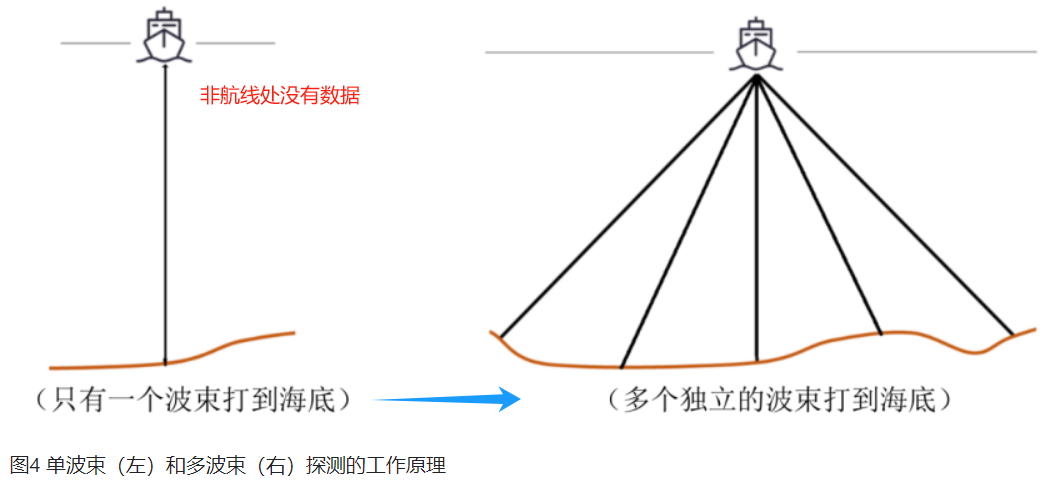

**多波束测深条带** 的覆盖宽度 $W$ 随换能器开角 $\theta$ 和水深 $D$ 的变化而变化。若**测线相互平行且海底地形平坦**, 则相邻条带之间的重叠率定义为  $\displaystyle\eta = 1 - \frac{d}{W}$, 其中 $d$ 为相邻两条测线的间距，$W$ 为条带的覆盖宽度 (图 5)。若 $\eta < 0$，则表示漏测部分海域。**为保证测量的便利性和数据的完整性, 相邻条带之间应有 $10\%\sim 20\%$ 的重叠率**。

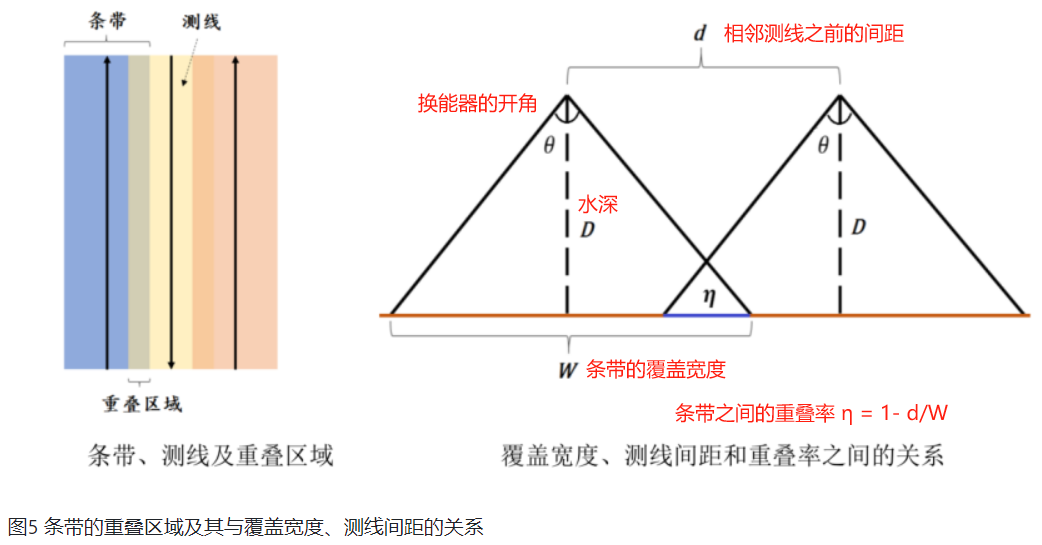

但真实海底地形起伏变化大, 若采用海区平均水深设计测线间隔, 虽然条带之间的平均重叠率可以满足要求, 但在<font color=red>**水深较浅处会出现漏测的情况**</font> (图 6), 影响测量质量; 若采用海区最浅处水深设计测线间隔, 虽然最浅处的重叠率可以满足要求, 但在水深较深处会出现重叠过多的情况 (图 6), 数据冗余量大, 影响测量效率。

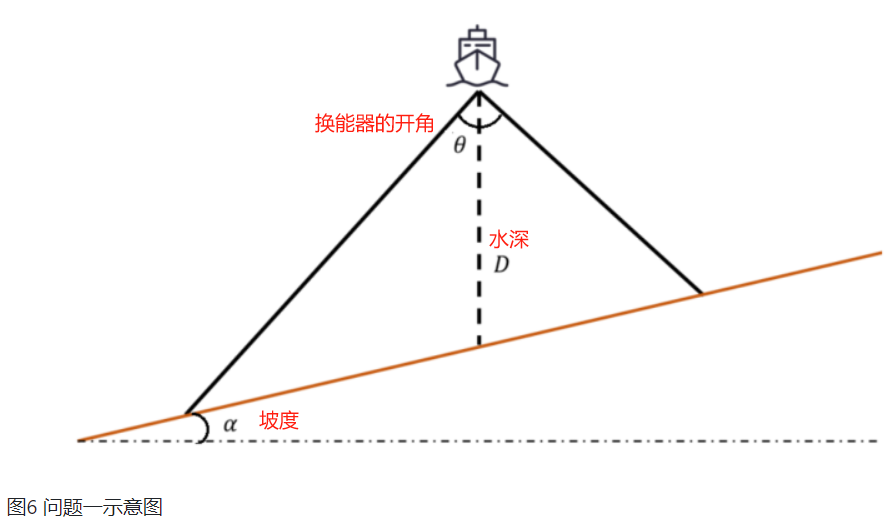

与测线方向垂直的平面和海底坡面的交线构成一条与水平面夹角为 $\alpha$ 的斜线（图 6），称 $\alpha$ 为坡度。<mark>请建立**多波束测深的覆盖宽度**及**相邻条带之间重叠率**的数学模型。</mark>

若多波束换能器的开角为 $120^{\circ}$，坡度为 $1.5^{\circ}$，海域中心点处的海水深度为 $70 ~\mathrm{m}$，利用上述模型计算表 1 中所列位置的指标值，将结果以表 1 的格式放在正文中，同时保存到  result1.xlsx 文件中。


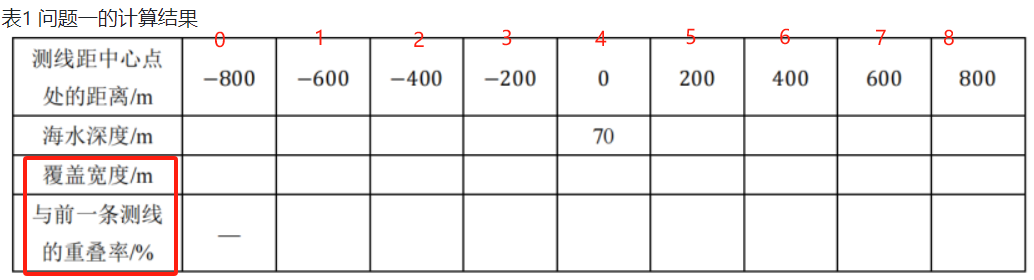

### 1.3.2 问题一的分析

对于问题一，这是一个几何模型问题。已知开角 $120^{\circ}$，坡度为 $1.5^{\circ}$，$D=70$，求覆盖宽度，这个问题本质上就是一个**已知三角形角度和角平分线长度求对边的几何问题**。可以反复利用三角形中的**正弦定理**求解左右两条波束落点的距离也就是带宽，随后通过几何关系求解重复部分。

### 1.3.3 建立问题一的模型 && 计算

#### ✔ 求第 1 行 水深

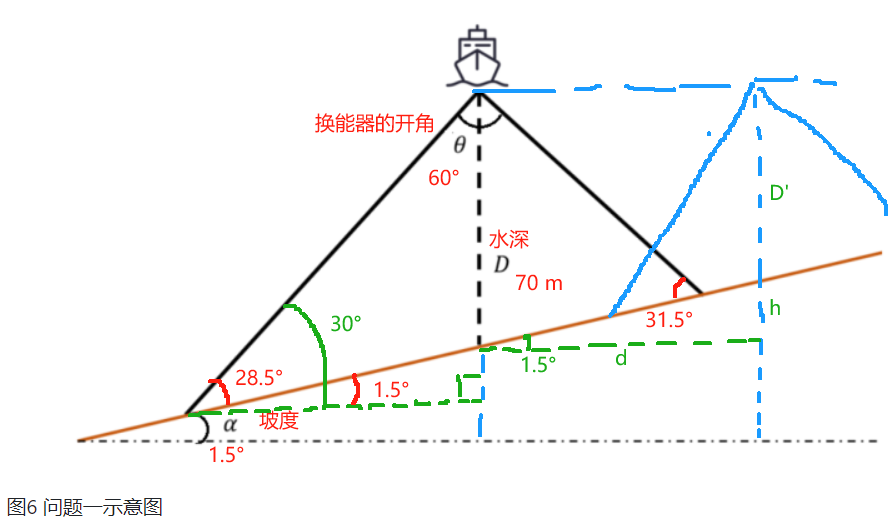

拟求：**第 1 行 海水深度** $D^\prime=D - d·\tan 1.5°$

* $\tan 15°=\frac{h}{d}$

In [ ]:
import numpy as np
res_Dright = [70]
# 右侧深度
for d in [200, 400, 600, 800]:
  res_Dright.append(70 - d * np.tan(np.deg2rad(1.5)))

# print(res_D)

# 左侧深度
res_Dleft = []
for d in [200, 400, 600, 800]:
  res_Dleft.append(70 + d * np.tan(np.deg2rad(1.5)))

res_D = np.round(res_Dleft[::-1] + res_Dright, decimals=2) # 保留到小数点后 2 位
print(res_D)

# [90.95 85.71 80.47 75.24 70.   64.76 59.53 54.29 49.05]

[90.95 85.71 80.47 75.24 70.   64.76 59.53 54.29 49.05]


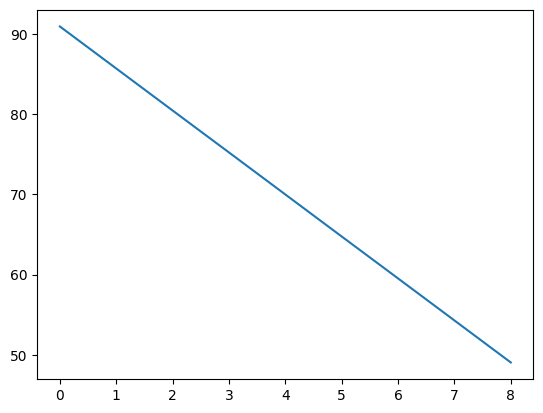

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res_D)

##### 官方参考

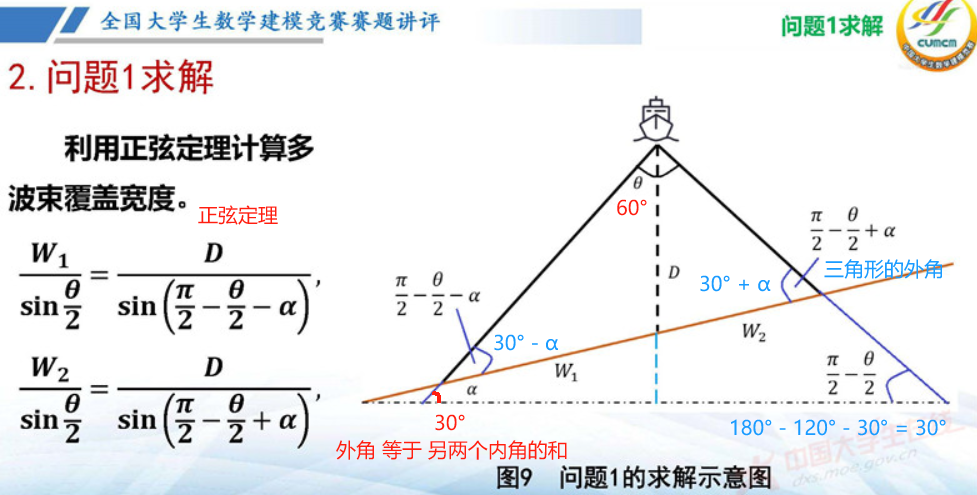

#### ✔ 求第 2 行 覆盖宽度

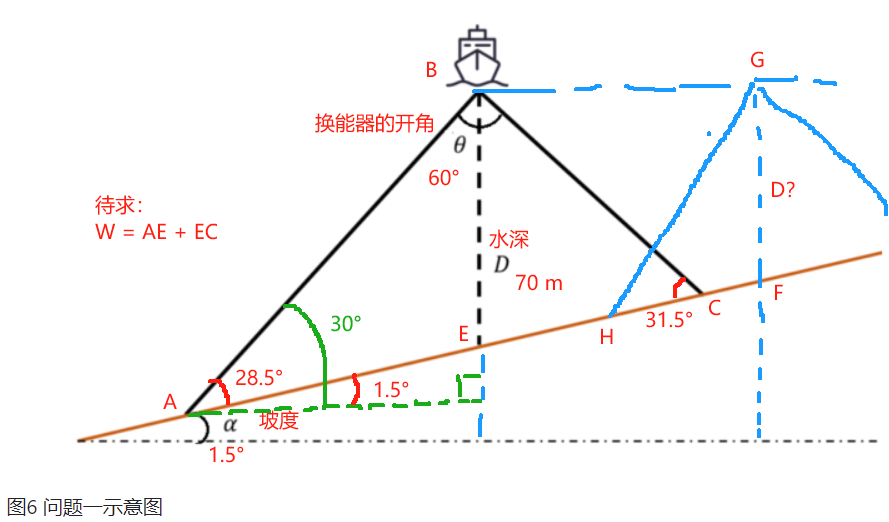

拟求： **第 2 行 覆盖宽度** W = AE + EC

对 ΔABE 运用正弦定理： $\frac{AE}{\sin 60°}=\frac{70}{\sin 28.5°}$

对 ΔBCE 运用正弦定理： $\frac{EC}{\sin 60°}=\frac{70}{\sin 31.5°}$




由三角形相似：

$\frac{W^\prime}{D^\prime}=\frac{W}{D}$


$W^\prime=\frac{D^\prime·W}{D}$

用 $W^\prime=\frac{D^\prime·W_0}{D_0}$ 计算

In [ ]:
# 需要用上面计算的 水深 res_D

# d =  0 时的覆盖宽度
res_W0 = 70 * (np.sin(np.deg2rad(60))/np.sin(np.deg2rad(28.5)) + np.sin(np.deg2rad(60))/np.sin(np.deg2rad(31.5)))
print(res_W0)
# 243.0702574623459


243.0702574623459


In [ ]:
res_W = []
for D in res_D:
  res_W.append( D * res_W0/70 )

print(np.round(res_W, decimals=2))  # 保留到小数点后 2 位

[315.82 297.62 279.43 261.27 243.07 224.87 206.71 188.52 170.32]


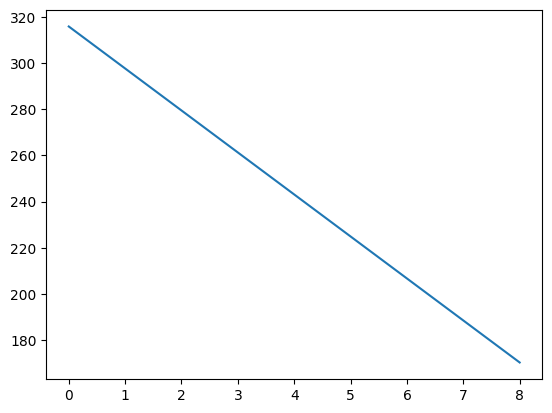

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res_W)

####  ✔ 求第 3 行 重叠率

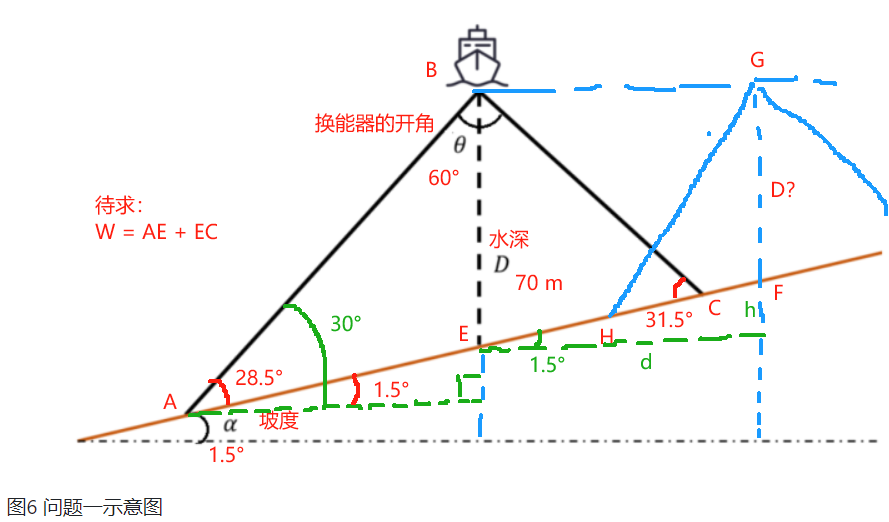

拟求： 第 3 行重叠率 $\eta=\frac{HC}{W}$

求： HC = EC + HF - EF

求 HF：
* 对 ΔGHF 运用正弦定理： $\frac{HF}{\sin 60°}=\frac{D^\prime}{\sin 28.5°}$

求 EF：
* $\cos 1.5°=\frac{d}{EF}$



In [ ]:
# d = 200 与 d = 0 的重叠率

EC = 70 * np.sin(np.deg2rad(60))/np.sin(np.deg2rad(31.5))  # 70： d = 0 处的 水深
HF = res_D[5] * np.sin(np.deg2rad(60))/np.sin(np.deg2rad(28.5))  # res_D[5]： d = 200 处的 水深
EF = 200 / np.cos(np.deg2rad(1.5)) # 测线间距
HC = EC + HF - EF
η = HC / res_W0  # res_W0：d =  0 处的覆盖宽度

print(η)

0.1377844175403788


In [ ]:
# 要用之前计算的 水深 和 覆盖宽度

res_η = ["—"]
for i in range(1, 9):
  EC = res_D[i-1] * np.sin(np.deg2rad(60))/np.sin(np.deg2rad(31.5))
  HF = res_D[i] * np.sin(np.deg2rad(60))/np.sin(np.deg2rad(28.5))
  EF = 200 / np.cos(np.deg2rad(1.5))  # 两两间隔都是 200
  HC = EC + HF - EF
  η = HC / res_W[i-1]
  res_η.append(np.round(η * 100, decimals=2))  # 保留到小数点后 2 位

print(res_η)

['—', 33.64, 29.58, 25.0, 19.78, 13.78, 6.81, -1.39, -11.17]


* <font size=4><font color=red>出现重叠率为负， 即不重叠的 ！！！,漏测了一些区域</font></font>
* 部分条带间的重叠率不满足推荐的重叠率区间 $10\%\sim20\%$

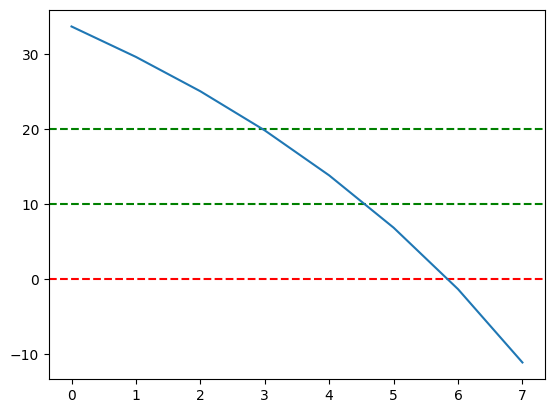

In [ ]:
import matplotlib.pyplot as plt
plt.axhline(0, color='red', linestyle='--')
plt.axhline(10, color='green', linestyle='--')
plt.axhline(20, color='green', linestyle='--')
plt.plot(res_η[1:])

### 官方参考答案

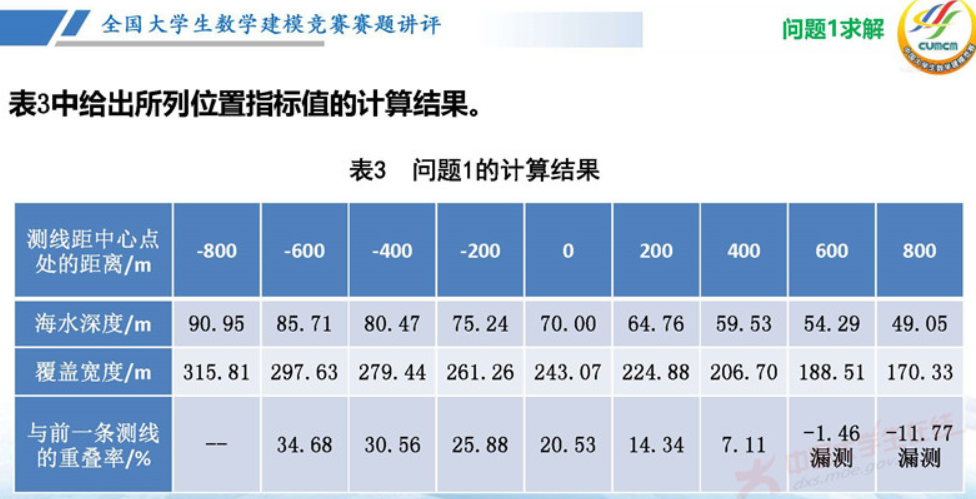

## 1.4 立体几何模型的构建

背景同上，问题如下：问题 2 考虑一个矩形待测海域（图 9），测线方向与海底坡面的法向在水平面上投影的夹角为 𝛽，<mark>请建立**多波束测深覆盖宽度**的数学模型。</mark>

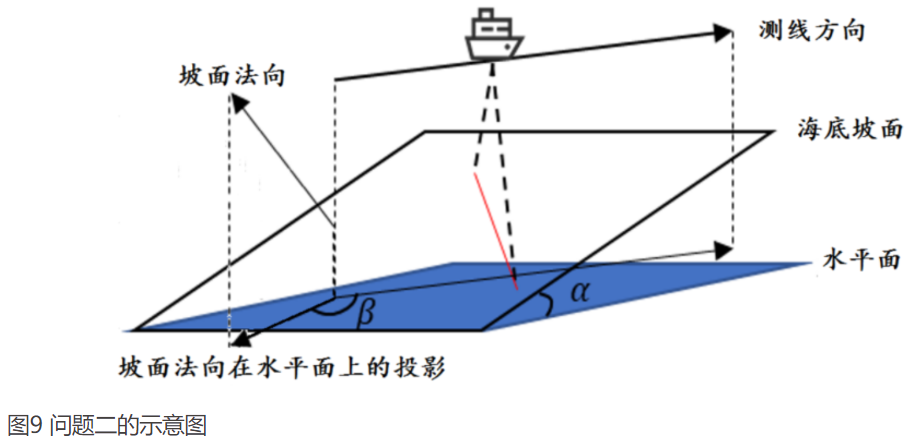

若多波束换能器的开角为 $120^{\circ}$，坡度为 $1.5^{\circ}$，海域中心点处的海水深度为 $120 \text{ m}$，利用上述模型计算表 2 中所列位置多波束测深的覆盖宽度，将结果以表 2 的格式放在正文中，同时保存到 result2.xlsx 文件中。

* <font size=4>**计算 图 9 中红色直线的长度**</font>

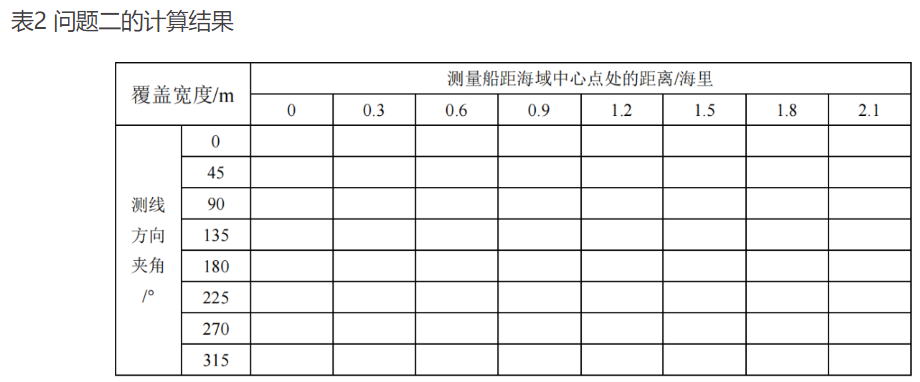

### 1.4.2 问题 2 模型的建立 && 计算

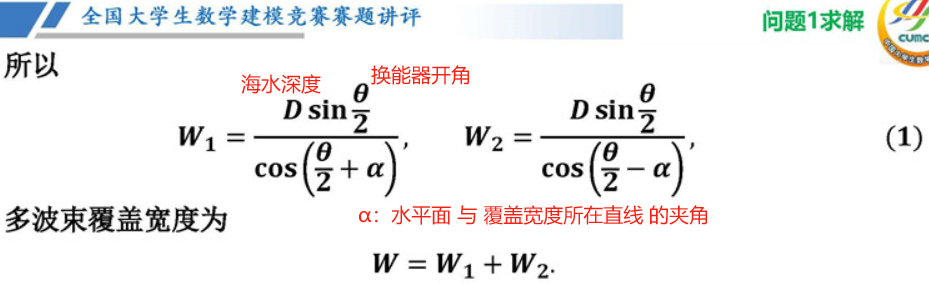

根据之前覆盖宽度的计算方式，只要知道
* **水平面** 与 **覆盖宽度所在直线**的夹角 $b$ ( 当 $\beta$ = 0° 或 180° 时， 有 $b=\alpha$ )
* 该位置处的海水深度 D

 * **测线在坡面上的投影** (红线) 与 **水平面** 的夹角 $a$  

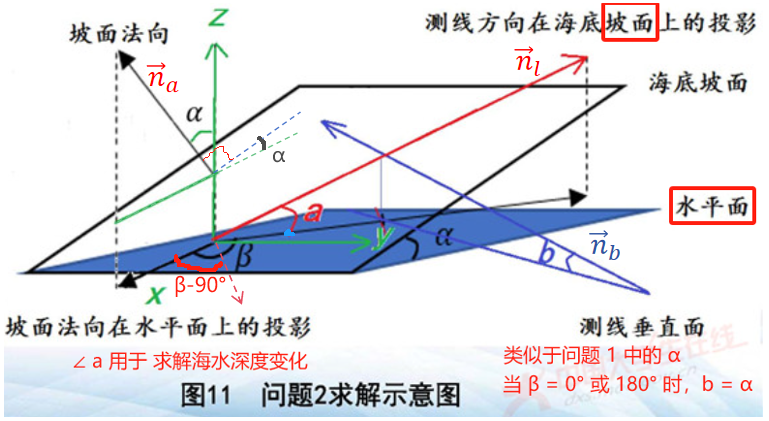

**坡面法线方向的坐标** $\overrightarrow{n}_a$ 为： $(\sin \alpha, 0, \cos \alpha )$


测线方向在坡面的投影 (<font color=red>红线</font>) 的向量坐标  $\overrightarrow{n}_l$   为： $(-\cos a \cos(180°-\beta),\cos a \sin(180°-\beta), \sin a)=(\cos a \cos\beta,\cos a \sin\beta, \sin a)~~~~~~~$ <font color=blue>直接根据角度关系</font>

坡面法向 与 坡面垂直， 内积为零：$\overrightarrow{n}_l · \overrightarrow{n}_a=\cos a \cos\beta\sin \alpha+\sin a\cos \alpha=0$

得： <mark>$\tan a = - \tan \alpha \cos \beta$</mark>


____

测线垂直面在海底坡面上的投影方向 (<font color=blue>蓝线方向</font>) 的坐标 $\overrightarrow{n}_b$ 为： $(-\cos b \cos (β-90°), -\cos b \sin(\beta - 90°), \sin b)=(-\cos b \sin \beta,  \cos b \cos \beta, \sin b)$

由于 坡面法向量 与 坡面垂直， 内积为 0， 则： $\overrightarrow{n}_b · \overrightarrow{n}_a=-\cos b \sin \beta\sin \alpha+\sin b \cos \alpha=0$

得：<mark> $\tan b = \tan \alpha \sin \beta$</mark>






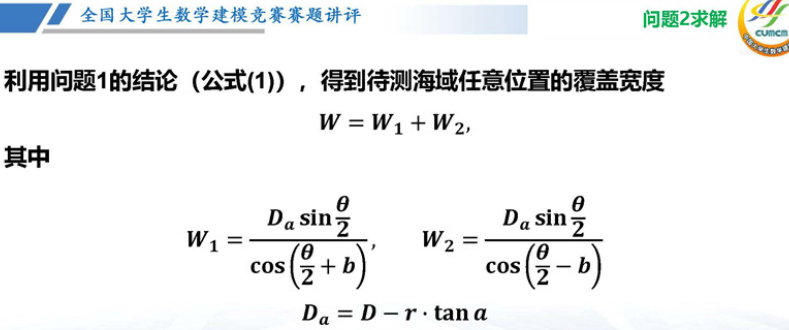

In [ ]:
import numpy as np

D = 120
α = np.deg2rad(1.5)
θ = np.deg2rad(60)  # 这里直接取 开角的一半

res = np.zeros((8, 8))
β_lis = np.arange(0, 360, 45)
L_lis = np.arange(0, 2.3, 0.3)


for i in range(0, 8):
  for j in range(0, 8):
    β = np.deg2rad(β_lis[i])
    L = L_lis[j] * 1852  # 海里 转成 米
    Da = D + L * np.tan(α) * np.cos(β)
    b = np.arctan(np.tan(α) * np.sin(β))
    res[i][j] = Da * np.sin(θ)/np.cos(θ + b) + Da * np.sin(θ)/np.cos(θ - b)

print(np.around(res, decimals=2))

[[415.69 466.09 516.49 566.89 617.29 667.69 718.09 768.48]
 [416.19 451.87 487.55 523.23 558.91 594.59 630.27 665.95]
 [416.69 416.69 416.69 416.69 416.69 416.69 416.69 416.69]
 [416.19 380.51 344.83 309.15 273.47 237.79 202.11 166.43]
 [415.69 365.29 314.89 264.5  214.1  163.7  113.3   62.9 ]
 [416.19 380.51 344.83 309.15 273.47 237.79 202.11 166.43]
 [416.69 416.69 416.69 416.69 416.69 416.69 416.69 416.69]
 [416.19 451.87 487.55 523.23 558.91 594.59 630.27 665.95]]


### 官方参考答案

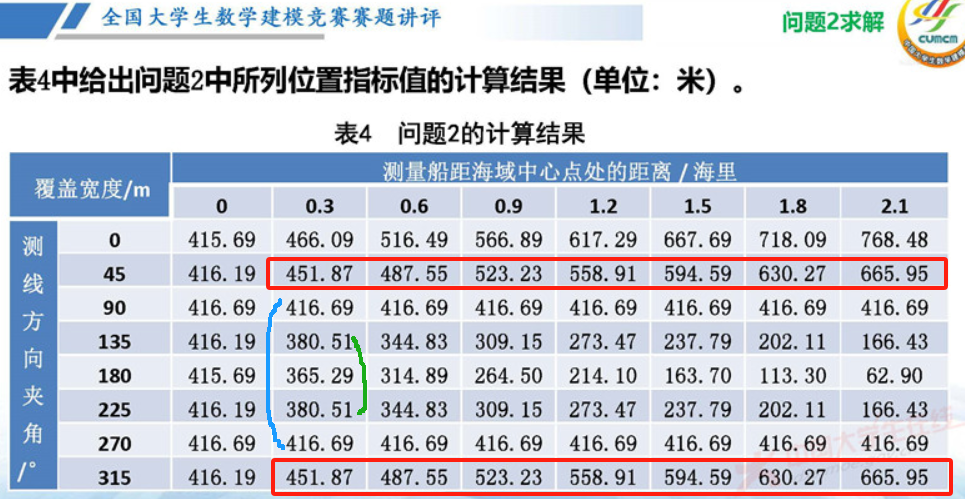